<style>
  code {
    color: #0971c5;
  }
</style>

<h1 style="text-align:center; font-size:3em;font-weight:bold;"> Car Racing: Proximal Policy Optimization</h1>

<hr style="border: 1px solid #ccc; margin: 20px 0;">

## Description
Reference: https://gymnasium.farama.org/environments/box2d/car_racing/

<div style="text-align: center;">
    <img src="images/car_racing.gif" style="width: 400px;">
</div>

This is a pixel-based racing environment where an agent (a car) has to learn to navigate a randomly generated track each episode.

<table>
  <tr>
    <td>Action Space</td>
    <td><code>Box([-1. 0. 0.], 1.0, (3,), float32)</code></td>
  </tr>
  <tr>
    <td>Observation Space</td>
    <td><code>Box(0, 255, (96, 96, 3), uint8)</code></td>
  </tr>
</table>

## Action Space
**If continuous there are 3 actions:**
[steer,gas,brake]

| Index | Action Element | Range         | Description                                   |
| ----- | -------------- | ------------- | --------------------------------------------- |
| 0     | `steer`        | [-1.0, 1.0] | -1 = full left, 0 = straight, +1 = full right |
| 1     | `gas`          | [0.0, 1.0]  | 0 = no throttle, 1 = full throttle            |
| 2     | `brake`        | [0.0, 1.0] | 0 = no brake, 1 = full brake                  |


</br>

**If discrete there are 5 action:**
| Index | Action        |
|-------|---------------|
| 0     | Do nothing    |
| 1     | Steer left    |
| 2     | Steer right   |
| 3     | Gas           |
| 4     | Brake         |

## Observation Space

$96 \times 96$ RGB image that captures the car and track. 


## Arguments


- `lap_complete_percent=0.95` dictates the percentage of tiles that must be visited by the agent before a lap is considered complete.

- `domain_randomize=False` enables the domain randomized variant of the environment. In this scenario, the background and track colours are different on every reset.

- `continuous=True` converts the environment to use discrete or continuous action space.

## Rewards

The reward is $-0.1$ every frame and $+1000/N$ for every track tile visited.
- $N =$ Total number of tiles visited in the track

For example, if you finished in 732 frames, then the reward is: $1000-0.1\times 732 =926.8$ points

## Episode Termination

Episodes ends when:
- All the tiles have been visited.
- Car goes outside the playfield (far off the track) when it will receive $-100$ reward and die.

<hr style="border: 1px solid #ccc; margin: 20px 0;">


# 0. Imports and Setup

In [1]:
# !pip install gymnasium
# !pip install gymnasium[classic-control]
# !pip install swig
# !pip install wheel setuptools pip --upgrade
# !pip install gymnasium[box2d]
# !pip install stable-baselines3
# !pip install stable-baselines3[extra] --upgrade
# !pip install tqdm rich
# !pip install "gymnasium[other]"
# !pip install moviepy

# IMPORTS

import gymnasium as gym
import matplotlib.pyplot as plt
import torch
import time

import imageio # to save video

import gymnasium
from gymnasium.wrappers import RecordVideo
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.atari_wrappers import WarpFrame
from stable_baselines3.common.vec_env import VecFrameStack, VecVideoRecorder
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecTransposeImage
import os
import torch
import numpy
import platform
import stable_baselines3
import matplotlib
import matplotlib.pyplot
from platform import python_version
from importlib.metadata import version

import cv2
import numpy as np

from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.env_util import make_vec_env

from utils.utils import * 


## Set up

In [7]:
# Defining path names
env_str = "CarRacing-v3"
base_log_dir = "./model_logs"

| learning_rate    | n_steps | batch_size | n_epochs | gamma   | gae_lambda | clip_range |normalize_advantage|ent_coef|
|-------|----------------|---------|-------------|----------------|-------------|-------------|--|--|
|0.0003 | 2048      | 64    | 10        | 0.99     | 0.95     | 0.2      |True|0.0|

- learning_rate: it can also be a function
- n_steps: number of steps to run for each environment per update (i.e. rollout buffer size = n_steps *n_envs, where n_envs is number of environment copies running in parallel)
- batch_size: Minibatch size
- n_epochs: Number of epoch when optimizing the surrogate loss
- gamma: Discount factor
- clip_range: Clipping parameter, it can be a function of the current progress remaining (1-0)
- normalize_advantage: Yes or No
- ent_coef: Entropy coefficient for the loss calculation

In [ ]:
# Defining path names
env_str = "CarRacing-v3"
base_log_dir = "./model_logs"

In [10]:
log_dir = get_unique_log_dir(base_log_dir, env_str)

print("Logging to:", log_dir)

env = create_env(env_id=env_str)
env_val = create_env(env_id=env_str, seed=100)

eval_callback = create_eval_callback(env=env_val, best_model_save_path=log_dir, log_path=log_dir)


Logging to: ./model_logs/CarRacing-v3_model_0


In [ ]:

# Model Parameters
model = PPO('CnnPolicy',env)


# Train the model
model.learn(total_timesteps=500_000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "ppo_car_racing"))


env.close()
env_val.close()


Output()

Eval num_timesteps=25000, episode_reward=-82.99 +/- 1.17

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=50000, episode_reward=-81.41 +/- 1.84

New best mean reward!

Eval num_timesteps=75000, episode_reward=-62.30 +/- 10.96

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=100000, episode_reward=264.14 +/- 158.46

Episode length: 682.05 +/- 176.87

New best mean reward!

Eval num_timesteps=125000, episode_reward=256.57 +/- 158.34

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=150000, episode_reward=13.10 +/- 26.90

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=175000, episode_reward=187.93 +/- 125.12

Episode length: 743.95 +/- 352.48

Eval num_timesteps=200000, episode_reward=185.24 +/- 72.34

Episode length: 965.80 +/- 149.07

Eval num_timesteps=225000, episode_reward=208.08 +/- 100.68

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=250000, episode_reward=362.10 +/- 289.79

Episode length: 893.75 +/- 232.06

New best mean reward!

Eval num_timesteps=275000, episode_reward=452.65 +/- 254.37

Episode length: 977.40 +/- 75.36

New best mean reward!

Eval num_timesteps=300000, episode_reward=492.70 +/- 251.98

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=325000, episode_reward=555.51 +/- 308.00

Episode length: 884.55 +/- 274.85

New best mean reward!

Eval num_timesteps=350000, episode_reward=708.74 +/- 173.79

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=375000, episode_reward=827.47 +/- 76.39

Episode length: 993.30 +/- 25.57

New best mean reward!

Eval num_timesteps=400000, episode_reward=767.04 +/- 253.69

Episode length: 983.55 +/- 44.12

Eval num_timesteps=425000, episode_reward=585.87 +/- 288.40

Episode length: 946.35 +/- 100.51

Eval num_timesteps=450000, episode_reward=444.46 +/- 214.99

Episode length: 997.25 +/- 11.99

Eval num_timesteps=475000, episode_reward=502.85 +/- 327.70

Episode length: 935.20 +/- 129.77

Eval num_timesteps=500000, episode_reward=266.55 +/- 125.11

Episode length: 973.40 +/- 115.95

Mean reward: 290.98 +/- 194.42


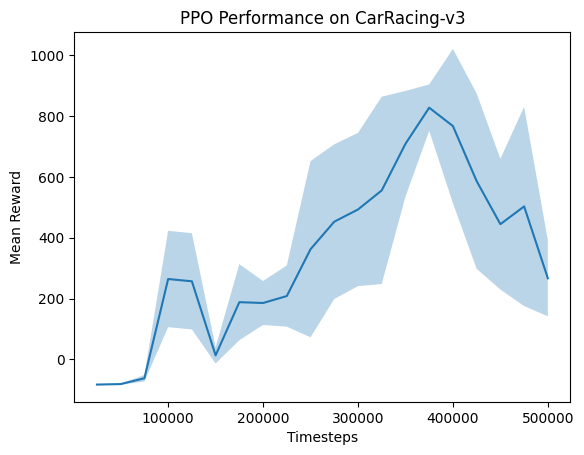

In [15]:
# Load the evaluations.npz file
data = numpy.load(os.path.join(log_dir, "evaluations.npz"))

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title(f"PPO Performance on {env_str}")
matplotlib.pyplot.show()

> What could be happening:
>- Zero entropy: 
>    Too deterministic, locked in on a suboptimal policy.
>
>- Overfitting to early behaviors: 
>    It found a decent path to 800, and kept repeating it.ut when the environment varied slightly, the policy wasn’t robust to handle it.
>
>- Catastrophic forgetting: </br>
>    PPO is on-policy, so bad updates after 800 might have overwritten good behaviors, especially given that entropy is zero.

## 1.1 Evaluate 30 Episodes

### 1.1.1 Deterministic

In [18]:
# Create Evaluation CarRacing environment
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


# Load the best model and evaluate it
best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=True)
    scores.append(returns)


Best Model - Mean reward: 810.63 +/- 99.41


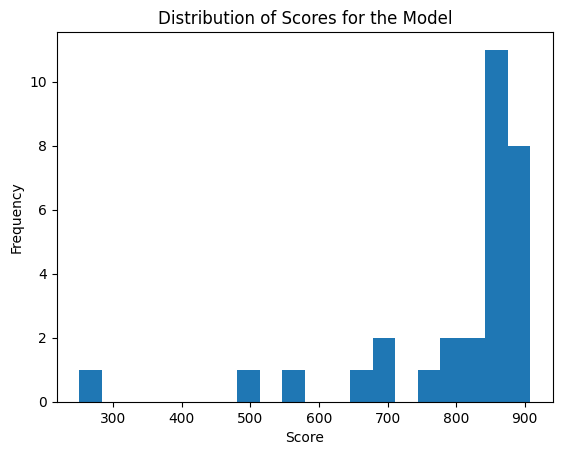

In [19]:
# DETERMINISTIC POLICY
plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

### 1.1.2 Stochastic

In [11]:
# Create Evaluation CarRacing environment
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


# Load the best model and evaluate it
best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30, deterministic=False)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=False)
    scores.append(returns)


Best Model - Mean reward: 720.64 +/- 159.91


In [ ]:
plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

## 1.2 Save Video

In [17]:
log_dir="./model_logs/CarRacing-v3_model_0"

In [18]:
video_folder = "./videos/car_racing_ppo"

env = create_env(env_str, n_envs=1,seed=0, wrapper_class=WarpFrame)

env = VecVideoRecorder(
    env,
    video_folder,
    record_video_trigger=lambda step: step == 0,
    video_length=1000,
    name_prefix="ppo_model_1"
)

best_model = PPO.load(os.path.join(log_dir, "best_model.zip"), env=env)

obs = env.reset()
for _ in range(1000):
    action, _ = best_model.predict(obs, deterministic=True)
    obs, _, dones, _ = env.step(action)
    if dones[0]:
        break

env.close()
print(f"Video saved to: {video_folder}")

Saving video to /notebooks/videos/car_racing_ppo/ppo_model_1-step-0-to-step-1000.mp4
MoviePy - Building video /notebooks/videos/car_racing_ppo/ppo_model_1-step-0-to-step-1000.mp4.
MoviePy - Writing video /notebooks/videos/car_racing_ppo/ppo_model_1-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready /notebooks/videos/car_racing_ppo/ppo_model_1-step-0-to-step-1000.mp4
Video saved to: ./videos/car_racing_ppo


In [19]:
latest_video = show_latest_video(video_folder=video_folder)
print("Played:", latest_video)

Played: ./videos/car_racing_ppo/ppo_model_1-step-0-to-step-1000.mp4


# 2. Add Entropy Coefficient

| learning_rate    | n_steps | batch_size | n_epochs | gamma   | gae_lambda | clip_range |normalize_advantage|ent_coef|
|-------|----------------|---------|-------------|----------------|-------------|-------------|--|--|
|0.0003 | 2048      | 64    | 10        | 0.99     | 0.95     | 0.2      |True|0.001|

In [9]:
log_dir = get_unique_log_dir(base_log_dir, env_str)

print("Logging to:", log_dir)

env = create_env(env_id=env_str)
env_val = create_env(env_id=env_str, seed=100)

eval_callback = create_eval_callback(env=env_val, best_model_save_path=log_dir, log_path=log_dir)


Logging to: ./model_logs/CarRacing-v3_model_1


In [ ]:
# Model Parameters
model = PPO('CnnPolicy',env, ent_coef= 0.001)


# Train the model
model.learn(total_timesteps=500_000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "ppo_car_racing"))

#139m


Output()

Eval num_timesteps=25000, episode_reward=94.69 +/- 104.29

Episode length: 801.10 +/- 316.73

New best mean reward!

Eval num_timesteps=50000, episode_reward=150.36 +/- 108.63

Episode length: 972.75 +/- 118.78

New best mean reward!

Eval num_timesteps=75000, episode_reward=195.84 +/- 137.57

Episode length: 690.90 +/- 344.95

New best mean reward!

Eval num_timesteps=100000, episode_reward=337.16 +/- 130.03

Episode length: 878.55 +/- 195.00

New best mean reward!

Eval num_timesteps=125000, episode_reward=202.47 +/- 167.44

Episode length: 690.45 +/- 348.30

Eval num_timesteps=150000, episode_reward=73.97 +/- 97.43

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=175000, episode_reward=335.72 +/- 248.47

Episode length: 829.35 +/- 297.34

Eval num_timesteps=200000, episode_reward=82.15 +/- 134.04

Episode length: 949.40 +/- 133.16

Eval num_timesteps=225000, episode_reward=54.43 +/- 96.81

Episode length: 960.25 +/- 173.27

Eval num_timesteps=250000, episode_reward=321.75 +/- 133.70

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=275000, episode_reward=332.31 +/- 250.23

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=300000, episode_reward=254.24 +/- 131.19

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=325000, episode_reward=512.98 +/- 267.44

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=350000, episode_reward=583.84 +/- 283.46

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=375000, episode_reward=653.22 +/- 312.88

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=400000, episode_reward=384.96 +/- 352.45

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=425000, episode_reward=443.47 +/- 166.24

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=450000, episode_reward=191.46 +/- 303.75

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=475000, episode_reward=209.93 +/- 183.10

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=500000, episode_reward=439.40 +/- 263.75

Episode length: 1000.00 +/- 0.00

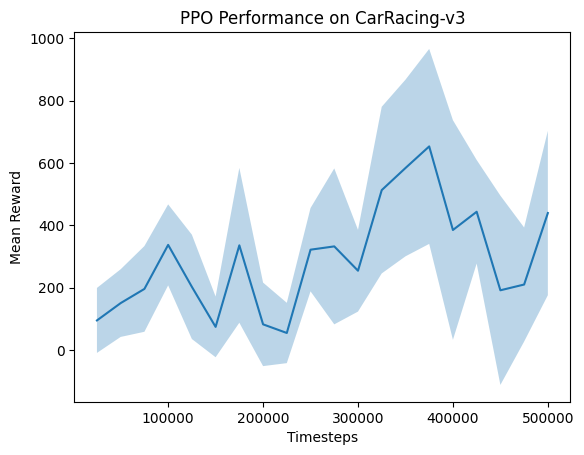

In [11]:
data = numpy.load(os.path.join(log_dir, "evaluations.npz"))

timesteps = data['timesteps']
results = data['results']

mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title(f"PPO Performance on {env_str}")
matplotlib.pyplot.show()

> Training was quite unstable, but it seemed to be improving. Maybe with more timesteps it could get better and get stable. But for now we will lower the entropy.

## 2.1 Evaluate 30 times

### 2.1.1 Deterministic

In [12]:
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=True)
    scores.append(returns)


Best Model - Mean reward: 619.45 +/- 246.57


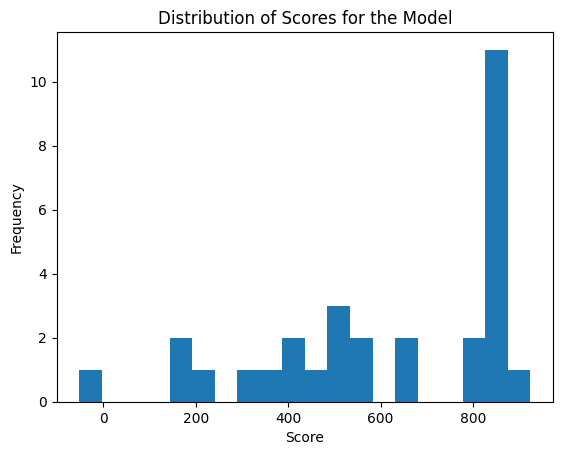

In [13]:
# DETERMINISTIC POLICY
plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

### 2.1.2 Stochastic 

In [17]:
lod_dir="./model_logs/CarRacing-v3_model_1"

Best Model - Mean reward: 781.25 +/- 219.91


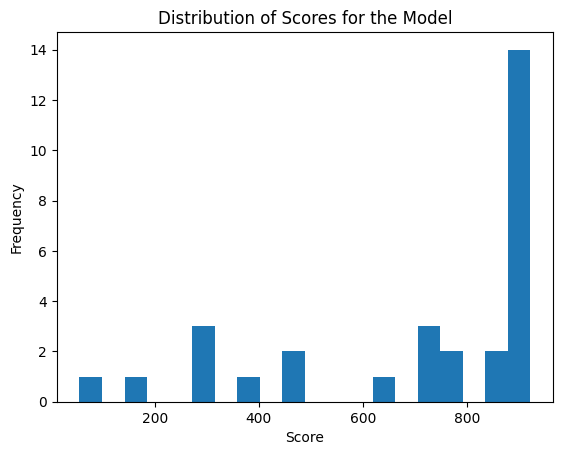

In [18]:
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30, deterministic=False)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=False)
    scores.append(returns)

plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

## 2.2 Save Video

In [20]:
log_dir="./model_logs/CarRacing-v3_model_1"

In [21]:
video_folder = "./videos/car_racing_ppo"

env = create_env(env_str, n_envs=1,seed=0, wrapper_class=WarpFrame)

env = VecVideoRecorder(
    env,
    video_folder,
    record_video_trigger=lambda step: step == 0,
    video_length=1000,
    name_prefix="ppo_model_2"
)

best_model = PPO.load(os.path.join(log_dir, "best_model.zip"), env=env)

obs = env.reset()
for _ in range(1000):
    action, _ = best_model.predict(obs, deterministic=True)
    obs, _, dones, _ = env.step(action)
    if dones[0]:
        break

env.close()
print(f"Video saved to: {video_folder}")

Saving video to /notebooks/videos/car_racing_ppo/ppo_model_2-step-0-to-step-1000.mp4
MoviePy - Building video /notebooks/videos/car_racing_ppo/ppo_model_2-step-0-to-step-1000.mp4.
MoviePy - Writing video /notebooks/videos/car_racing_ppo/ppo_model_2-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready /notebooks/videos/car_racing_ppo/ppo_model_2-step-0-to-step-1000.mp4
Video saved to: ./videos/car_racing_ppo


In [22]:
latest_video = show_latest_video(video_folder=video_folder)
print("Played:", latest_video)

Played: ./videos/car_racing_ppo/ppo_model_2-step-0-to-step-1000.mp4


# 3. Entropy = 0.0001

In [10]:
log_dir = get_unique_log_dir(base_log_dir, env_str)

print("Logging to:", log_dir)

env = create_env(env_id=env_str)
env_val = create_env(env_id=env_str, seed=100)

eval_callback = create_eval_callback(env=env_val, best_model_save_path=log_dir, log_path=log_dir)


Logging to: ./model_logs/CarRacing-v3_model_3


In [11]:
# Model Parameters
model = PPO('CnnPolicy',env, ent_coef=0.0005)


# Train the model
model.learn(total_timesteps=500_000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "ppo_car_racing"))

env.close()
env_val.close()


Output()

Eval num_timesteps=25000, episode_reward=-85.38 +/- 31.81

Episode length: 304.45 +/- 231.88

New best mean reward!

Eval num_timesteps=50000, episode_reward=72.60 +/- 64.53

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=75000, episode_reward=-18.48 +/- 80.28

Episode length: 525.90 +/- 197.23

Eval num_timesteps=100000, episode_reward=694.43 +/- 132.81

Episode length: 999.20 +/- 2.71

New best mean reward!

Eval num_timesteps=125000, episode_reward=733.29 +/- 133.88

Episode length: 997.45 +/- 7.65

New best mean reward!

Eval num_timesteps=150000, episode_reward=750.77 +/- 102.45

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=175000, episode_reward=779.52 +/- 133.39

Episode length: 984.15 +/- 47.56

New best mean reward!

Eval num_timesteps=200000, episode_reward=676.80 +/- 173.68

Episode length: 988.65 +/- 45.10

Eval num_timesteps=225000, episode_reward=836.47 +/- 56.30

Episode length: 995.75 +/- 18.53

New best mean reward!

Eval num_timesteps=250000, episode_reward=867.33 +/- 37.75

Episode length: 993.15 +/- 29.86

New best mean reward!

Eval num_timesteps=275000, episode_reward=765.72 +/- 105.23

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=300000, episode_reward=786.37 +/- 154.80

Episode length: 999.90 +/- 0.44

Eval num_timesteps=325000, episode_reward=883.06 +/- 44.81

Episode length: 959.40 +/- 54.09

New best mean reward!

Eval num_timesteps=350000, episode_reward=850.42 +/- 72.38

Episode length: 979.45 +/- 34.02

Eval num_timesteps=375000, episode_reward=772.16 +/- 118.59

Episode length: 997.10 +/- 12.64

Eval num_timesteps=400000, episode_reward=751.38 +/- 155.75

Episode length: 990.90 +/- 25.44

Eval num_timesteps=425000, episode_reward=859.40 +/- 71.23

Episode length: 961.70 +/- 52.45

Eval num_timesteps=450000, episode_reward=829.07 +/- 142.34

Episode length: 975.30 +/- 60.15

Eval num_timesteps=475000, episode_reward=874.70 +/- 60.57

Episode length: 965.70 +/- 49.33

Eval num_timesteps=500000, episode_reward=679.32 +/- 318.83

Episode length: 931.85 +/- 163.13

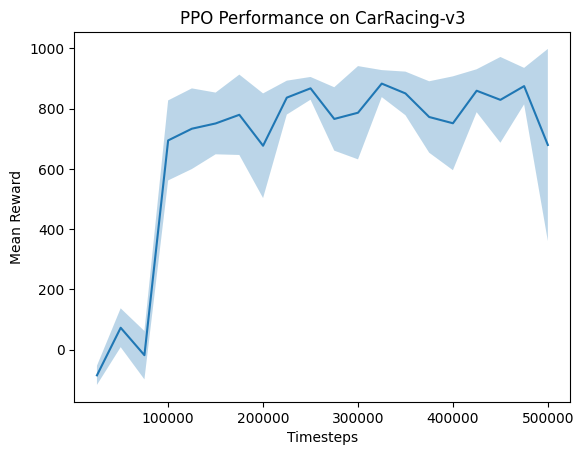

In [12]:
data = numpy.load(os.path.join(log_dir, "evaluations.npz"))

timesteps = data['timesteps']
results = data['results']

mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title(f"PPO Performance on {env_str}")
matplotlib.pyplot.show()

## 3.1 Evaluate 30 Episodes

### 3.1.1 Deterministic

In [11]:
log_dir="./model_logs/CarRacing-v3_model_3"

In [13]:
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30, deterministic=True)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=True)
    scores.append(returns)


Best Model - Mean reward: 874.59 +/- 167.95


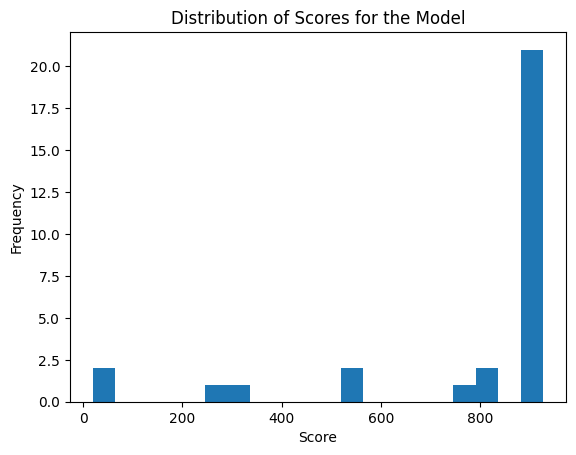

In [14]:
# DETERMINISTIC POLICY
plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

### 3.1.2 Stochastic

In [15]:
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30, deterministic=False)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=False)
    scores.append(returns)


Best Model - Mean reward: 791.36 +/- 187.98


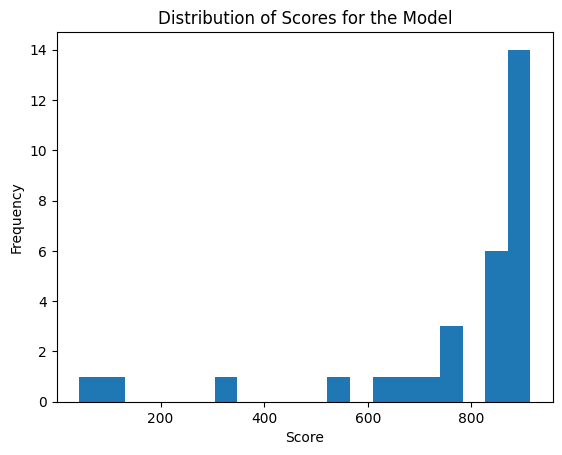

In [16]:
# Plot
plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

## 3.2 Save Video

In [23]:
log_dir="./model_logs/CarRacing-v3_model_3"

In [24]:
video_folder = "./videos/car_racing_ppo"

env = create_env(env_str, n_envs=1,seed=0, wrapper_class=WarpFrame)

env = VecVideoRecorder(
    env,
    video_folder,
    record_video_trigger=lambda step: step == 0,
    video_length=1000,
    name_prefix="ppo_model_3"
)

best_model = PPO.load(os.path.join(log_dir, "best_model.zip"), env=env)

obs = env.reset()
for _ in range(1000):
    action, _ = best_model.predict(obs, deterministic=True)
    obs, _, dones, _ = env.step(action)
    if dones[0]: 
        break

env.close()
print(f"Video saved to: {video_folder}")

Saving video to /notebooks/videos/car_racing_ppo/ppo_model_3-step-0-to-step-1000.mp4
MoviePy - Building video /notebooks/videos/car_racing_ppo/ppo_model_3-step-0-to-step-1000.mp4.
MoviePy - Writing video /notebooks/videos/car_racing_ppo/ppo_model_3-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready /notebooks/videos/car_racing_ppo/ppo_model_3-step-0-to-step-1000.mp4
Video saved to: ./videos/car_racing_ppo


In [25]:
latest_video = show_latest_video(video_folder=video_folder)
print("Played:", latest_video)

Played: ./videos/car_racing_ppo/ppo_model_3-step-0-to-step-1000.mp4


# 4. Higher rollout

In [9]:
log_dir = get_unique_log_dir(base_log_dir, env_str)

print("Logging to:", log_dir)

env = create_env(env_id=env_str)
env_val = create_env(env_id=env_str, seed=100)

eval_callback = create_eval_callback(env=env_val, best_model_save_path=log_dir, log_path=log_dir)


Logging to: ./model_logs/CarRacing-v3_model_4


In [ ]:
# Model Parameters
model = PPO('CnnPolicy',env, ent_coef=0.0005, n_steps=4096, batch_size=128)


# Train the model
model.learn(total_timesteps=500_000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "ppo_car_racing"))

env.close()
env_val.close()

# 162m


Output()

Eval num_timesteps=25000, episode_reward=-58.40 +/- 13.85

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=50000, episode_reward=-27.60 +/- 40.15

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=75000, episode_reward=0.16 +/- 35.87

Episode length: 736.60 +/- 359.77

New best mean reward!

Eval num_timesteps=100000, episode_reward=144.59 +/- 102.27

Episode length: 727.70 +/- 345.20

New best mean reward!

Eval num_timesteps=125000, episode_reward=243.94 +/- 148.50

Episode length: 977.10 +/- 99.82

New best mean reward!

Eval num_timesteps=150000, episode_reward=248.14 +/- 124.15

Episode length: 916.60 +/- 205.57

New best mean reward!

Eval num_timesteps=175000, episode_reward=200.01 +/- 105.76

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=200000, episode_reward=102.64 +/- 122.79

Episode length: 989.50 +/- 45.77

Eval num_timesteps=225000, episode_reward=280.55 +/- 107.13

Episode length: 982.25 +/- 77.37

New best mean reward!

Eval num_timesteps=250000, episode_reward=248.30 +/- 158.96

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=275000, episode_reward=316.34 +/- 255.58

Episode length: 730.30 +/- 252.87

New best mean reward!

Eval num_timesteps=300000, episode_reward=595.69 +/- 236.42

Episode length: 980.10 +/- 54.99

New best mean reward!

Eval num_timesteps=325000, episode_reward=319.26 +/- 213.48

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=350000, episode_reward=559.56 +/- 292.23

Episode length: 976.55 +/- 70.78

Eval num_timesteps=375000, episode_reward=313.90 +/- 174.40

Episode length: 997.35 +/- 11.55

Eval num_timesteps=400000, episode_reward=348.12 +/- 214.45

Episode length: 990.30 +/- 29.48

Eval num_timesteps=425000, episode_reward=476.67 +/- 180.65

Episode length: 974.55 +/- 73.72

Eval num_timesteps=450000, episode_reward=520.88 +/- 177.14

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=475000, episode_reward=453.98 +/- 232.06

Episode length: 989.25 +/- 39.39

Eval num_timesteps=500000, episode_reward=542.94 +/- 273.95

Episode length: 955.40 +/- 128.34

> This is not getting to a really high score, it could be it needs more time to train to be able to get there.

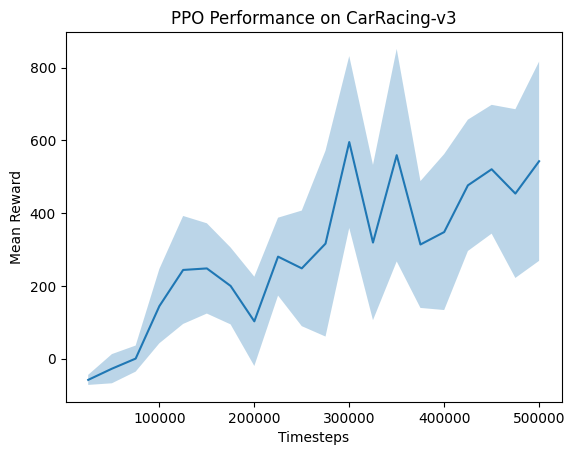

In [15]:
data = numpy.load(os.path.join(log_dir, "evaluations.npz"))

timesteps = data['timesteps']
results = data['results']

mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title(f"PPO Performance on {env_str}")
matplotlib.pyplot.show()

## 4.1 Evalute 30 Episodes

### 4.1.1 Deterministic

Best Model - Mean reward: 640.52 +/- 295.33


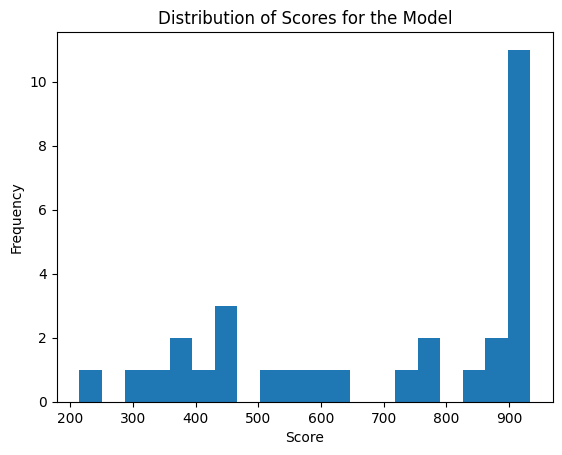

In [16]:
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=True)
    scores.append(returns)

plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

### 4.1.2 Stochastic

Best Model - Mean reward: 624.13 +/- 311.96


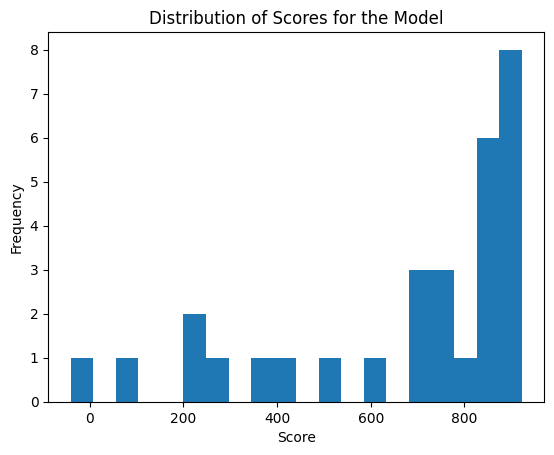

In [20]:
env = create_env(env_str, n_envs=1, seed=0, wrapper_class=WarpFrame)


best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=30, deterministic=False)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

scores = []
for _ in range(30):
    returns, _ = evaluate_policy(best_model, env, n_eval_episodes=1, deterministic=False)
    scores.append(returns)

plt.hist(scores, bins=20)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores for the Model")
plt.show()

## 4.2 Save Video

In [26]:
log_dir="./model_logs/CarRacing-v3_model_4"

In [ ]:
video_folder = "./videos/car_racing_ppo"

env = create_env(env_str, n_envs=1,seed=0, wrapper_class=WarpFrame)

env = VecVideoRecorder(
    env,
    video_folder,
    record_video_trigger=lambda step: step == 0,
    video_length=1000,
    name_prefix="ppo_model_4"
)

best_model = PPO.load(os.path.join(log_dir, "best_model.zip"), env=env)

obs = env.reset()
for _ in range(1000):
    action, _ = best_model.predict(obs, deterministic=True)
    obs, _, dones, _ = env.step(action)
    if dones[0]: 
        break

env.close()
print(f"Video saved to: {video_folder}")

Saving video to /notebooks/videos/car_racing_ppo/ppo_model_4-step-0-to-step-1000.mp4
MoviePy - Building video /notebooks/videos/car_racing_ppo/ppo_model_4-step-0-to-step-1000.mp4.
MoviePy - Writing video /notebooks/videos/car_racing_ppo/ppo_model_4-step-0-to-step-1000.mp4



MoviePy - Done !
MoviePy - video ready /notebooks/videos/car_racing_ppo/ppo_model_4-step-0-to-step-1000.mp4
Video saved to: ./videos/car_racing_ppo


In [29]:
latest_video = show_latest_video(video_folder=video_folder)
print("Played:", latest_video)

Played: ./videos/car_racing_ppo/ppo_model_4-step-0-to-step-1000.mp4
